In [76]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
# import pickle
from tensorflow.keras.models import load_model

In [77]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [78]:
x=df.drop("label",axis=1)
y=df["label"].tolist()
yx=list(set(y))
len(yx)
yx


['grapes',
 'maize',
 'coconut',
 'mothbeans',
 'orange',
 'chickpea',
 'rice',
 'banana',
 'muskmelon',
 'coffee',
 'jute',
 'pigeonpeas',
 'blackgram',
 'apple',
 'mango',
 'cotton',
 'papaya',
 'pomegranate',
 'mungbean',
 'kidneybeans',
 'watermelon',
 'lentil']

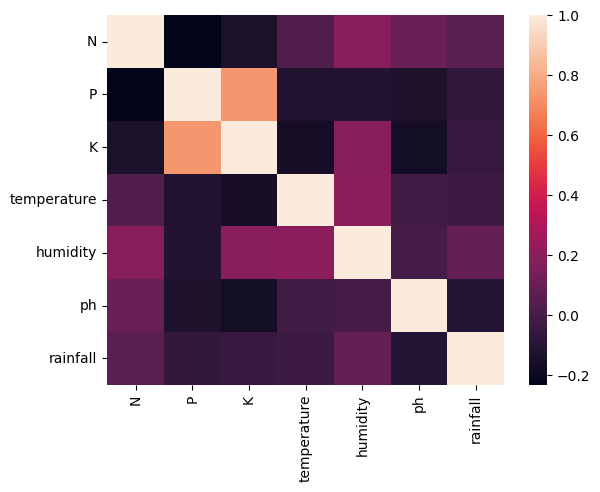

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset
dataplot = sns.heatmap(df.corr()) 
  
# displaying heatmap 
plt.show() 

In [80]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
scaled_x = scaler.fit_transform(x) 
df2=pd.DataFrame(scaled_x)
df2

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [81]:
from sklearn import preprocessing

y=df["label"]
label_encoder = preprocessing.LabelEncoder()
encoded = label_encoder.fit_transform((y))
encoded=pd.DataFrame(encoded).to_numpy()


In [82]:
model=tf.keras.models.Sequential()
model.add(keras.layers.Dense(32,activation="relu",input_shape=(7,)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
# model.add(keras.layers.Dense(512,activation="relu"))
# model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dense(512,activation="relu"))
# model.add(keras.layers.Dense(22,activation="relu"))
model.add(keras.layers.Dense(22, activation='softmax'))


In [83]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [84]:
model.fit(df2, encoded, epochs=30,batch_size=100)

Train on 2200 samples
Epoch 1/30
2200/2200 [==============================] - 0s 77us/sample - loss: 3.0221 - acc: 0.3223
Epoch 2/30
2200/2200 [==============================] - 0s 20us/sample - loss: 2.6925 - acc: 0.5418
Epoch 3/30
2200/2200 [==============================] - 0s 21us/sample - loss: 2.4422 - acc: 0.7755
Epoch 4/30
2200/2200 [==============================] - 0s 21us/sample - loss: 2.3375 - acc: 0.8600
Epoch 5/30
2200/2200 [==============================] - 0s 21us/sample - loss: 2.2742 - acc: 0.9132
Epoch 6/30
2200/2200 [==============================] - 0s 20us/sample - loss: 2.2517 - acc: 0.9309
Epoch 7/30
2200/2200 [==============================] - 0s 21us/sample - loss: 2.2410 - acc: 0.9386
Epoch 8/30
2200/2200 [==============================] - 0s 21us/sample - loss: 2.2362 - acc: 0.9445
Epoch 9/30
2200/2200 [==============================] - 0s 22us/sample - loss: 2.2159 - acc: 0.9609
Epoch 10/30
2200/2200 [==============================] - 0s 22us/sample - loss

In [85]:
# pickle.dump(model,"model1.pkl")
model.save('model1.h5')

In [86]:
savedModel=load_model('model1.h5')
savedModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_34 (Dense)             (None, 22)                11286     
Total params: 180,374
Trainable params: 180,374
Non-trainable params: 0
_________________________________________________________________
